In [1]:
!pip install pyswarm
!pip install torchswarm
!pip install pyswarms
!pip install -U scikit-multiflow

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4481 sha256=98c5eb4c2ad6b5ee14eb984273343b8e71f51066f64b6a73f3fbfae2c2f58691
  Stored in directory: /root/.cache/pip/wheels/ac/69/65/926e9c51b9fa99757cb43e8f6b74c5e6bb8b41a038b35c2db1
Successfully built pyswarm
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 345.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.2 MB/s eta 0:00:00a 0:00:010m


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import tensorflow as tf
import math
import torch
from torch import nn
from torch.nn import functional as F
from torch.autograd import Variable 
from pyswarm import pso
from pyswarms.utils.functions import single_obj as fx
from torchswarm.swarmoptimizer import SwarmOptimizer
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from pyswarm import pso
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier 
from skmultiflow.drift_detection.adwin import ADWIN
from sklearn.metrics import classification_report, accuracy_score  

In [4]:
df=pd.read_csv('../input/creditcardfraud/creditcard.csv')
df_time=df['Time']

df_fraud=df['Class']


dtime=np.array(df_time)
np.where(dtime==86400)


(array([144786]),)

In [ ]:
one_dat=df_fraud[:144786]
one_dat.shape

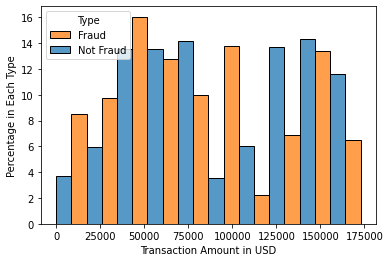

In [5]:

ax=sns.histplot(x='Time',data=df,hue='Class',stat='percent',multiple='dodge',common_norm=False,bins=10)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [ ]:
adwin = ADWIN()

previous_variance = 0
for i in range(144786):
    adwin.add_element(one_dat[i])
    if adwin.detected_change():
        print("Change detected in value {}, at index {}".format(one_dat[i], i))
        print("Current variance: {}. Previous variance {}".format(adwin.variance, previous_variance))
    previous_variance = adwin.variance

In [ ]:
df_time[22527]/(60*60)

In [6]:

df_select=df.drop(['Class'],axis=1)
#df_select=df.drop(['Time'],axis=1)
features=np.array(df_select)
label=np.array(df_fraud)

In [7]:
oversample = SMOTE()
X_r, y = oversample.fit_resample(features, label)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# count number of zero and one
for label, _ in counter.items():
    row_ix = where(y == label)[0]

X_r2 = StandardScaler().fit_transform(X_r)
#Standardize features by removing the mean and scaling to unit variance.
X_r2


Counter({0: 284315, 1: 284315})


array([[-1.8246283 ,  0.20408055, -0.54734456, ...,  0.05636339,
        -0.14784837,  0.24567702],
       [-1.8246283 ,  0.6732828 , -0.45387388, ..., -0.09300902,
        -0.06244944, -0.42076402],
       [-1.82460753,  0.20434774, -0.89686333, ..., -0.14160086,
        -0.24022096,  1.28455034],
       ...,
       [-0.9699324 , -0.42056517,  0.86692226, ...,  2.11750972,
         2.05730295,  1.01102665],
       [-1.66779215,  0.48353972,  0.5161092 , ...,  0.66030693,
         0.90725014, -0.42842948],
       [ 0.30744301, -2.41312691,  2.9201855 , ..., -2.72141475,
        -1.20070744, -0.43294564]])

In [ ]:
rf_sf = RandomForestClassifier() 

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X_r2, y, test_size=0.3)

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


In [ ]:
X_train.shape[1]

In [ ]:

EarlyStopper = EarlyStopping(patience=4, monitor='val_loss', mode='min')
model = Sequential()
model.add(LSTM(11,return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(layers.Flatten())
model.add(Dense(1, kernel_initializer='lecun_uniform', activation='sigmoid'))
model.compile(loss='MeanSquaredError', optimizer='adam', metrics=["accuracy"])
model.summary()


In [13]:
#to cateculate which feature pso choose
def mind(m):
    l=[]
    for i in range(30):
        if m[i]==1:
            l.append(i)
    return l


In [9]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
classifier = linear_model.LogisticRegression()
# this part is use the PSO and cross valation scores of logist regression
def f_per_particlerf(m, alpha):
   #alpha constant weight for trading-off classifier performance and number of features
    total_features = X_r2.shape[1]

    
    if np.count_nonzero(m) == 0: 
         X_subset = X_r2
    else:
        l=mind(m)
        X_subset = X_r2[:,l]
   # X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.20, random_state=123)

    scores = cross_val_score(classifier, X_subset, y, cv=3)
    

    P = scores.mean()


    particleScore.append(P)
    particleSize.append(X_subset.shape[1])
    #recored the each pso score and each feature size in each particle

    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))
    #Penalize if too many features are selected

    return j
def ff(x, alpha=0.9):

    n_particles = x.shape[0]
    j = [f_per_particlerf(x[i], alpha) for i in range(n_particles)]

    return np.array(j)

In [10]:

# the same way but the feature selection way is change to the lstm
def f_per_particleLSTM(m, alpha):
   
    total_features = X_r2.shape[1]

    
    if np.count_nonzero(m) == 0: 
         X_subset = X_r2
    else:
        l=mind(m)
        X_subset = X_r2[:,l]
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.20, random_state=123)

    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    model = Sequential()
    model.add(LSTM(11,return_sequences=True, input_shape = (X_train.shape[1],1)))
    model.add(layers.Flatten())
    model.add(Dense(1, kernel_initializer='lecun_uniform', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
    model.fit(X_train, y_train,batch_size=64, verbose=1, workers=8, use_multiprocessing=True)
    P, test_acc = model.evaluate(X_test, y_test, verbose=0)

    particleScore.append(P)
    particleSize.append(X_subset.shape[1])

    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))
    

    return j
def f(x, alpha=0.9):

    n_particles = x.shape[0]
    j = [f_per_particleLSTM(x[i], alpha) for i in range(n_particles)]

    return np.array(j)

In [11]:
!pip install pyswarms==0.2.0
from pyswarms.utils.environments import PlotEnvironment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 254.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.5/824.5 kB 1.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.7/186.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.8/375.8 kB 8.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for future: filename=future-0.16.0-py3-none-any.whl size=487808 sha256=934f47ef0b7225bb2348dba6071fe572acc90fcef6bdfa899cd172ec03c00415
  Stored in directory: /root/.cache/pip/wheels/7c/09/6f/dfd31fb2ebe951aefbee461a0dfce1bdc2e4b2c1016e85d233
  Created wheel for PyYAML: filename=PyYAML-3.12-cp37-cp37m-linux_x86_64.whl size=43073 sha256=3e5637c1338503796872c074d82bd85294e622e9b0611e153affc551dc4fc422
  Stored in directory: /root/.cache/pip/wheels/21/cc/0a/8f691c938b07

In [14]:
from datetime import datetime as dt
import time
from pyswarms.single import GlobalBestPSO
from pyswarms.discrete import BinaryPSO
from sklearn.model_selection import cross_val_score

start = dt.now()
# to record the time 
print("Started at: ", str(start))
particleScore = list()
particleSize = list()
# Initialize swarm, arbitrary
options = {'c1': 2, 'c2': 2, 'w':0.3, 'k': 1, 'p':2}

dimensions = X_r2.shape[1] 


optimizer =BinaryPSO(n_particles=2, dimensions=dimensions, options=options)


# Perform optimization
cost, pos = optimizer.optimize(ff,iters=5, verbose=2)
print(cost,pos)

2022-09-27 07:14:51,446 - pyswarms.discrete.binary - INFO - Optimize for 5 iters with {'c1': 2, 'c2': 2, 'w': 0.3, 'k': 1, 'p': 2}


Started at:  2022-09-27 07:14:51.438436


pyswarms.discrete.binary: 100%|██████████|5/5, best_cost=0.0634
2022-09-27 07:15:56,106 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.0634437176041438, best pos: [0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0]


0.0634437176041438 [0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0]


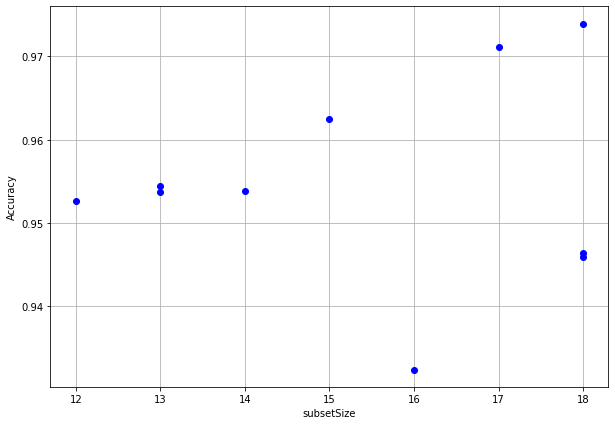

In [15]:
import matplotlib.pyplot as plt #MatPlotLib usado para desenhar o gráfico criado com o NetworkX

#iterations = list(range(1,len(optimizer.get_cost_history)+1))
plt.figure(figsize=(10,7))
#plt.xlabel('2^i classes')
plt.xlabel('subsetSize')
plt.ylabel('Accuracy')
plt.plot(particleSize, particleScore, 'bo')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)


#plt.savefig("D:/USP/2018-1/Computação Bioinspirada/Trabalhos/iterationVSerrorRate2.png", format="PNG")


plt.show()

In [ ]:
from datetime import datetime as dt
import time
from pyswarms.single import GlobalBestPSO
from pyswarms.discrete import BinaryPSO


start = dt.now()
print("Started at: ", str(start))
particleScore = list()
particleSize = list()
options = {'c1': 2, 'c2': 2, 'w':0.3, 'k': 1, 'p':2}


dimensions = X_r2.shape[1] 

optimizer =BinaryPSO(n_particles=2, dimensions=dimensions, options=options)

# Perform optimization
cost, pos = optimizer.optimize(f,iters=5, verbose=2)



In [ ]:
#history = model.fit(X_train, y_train, epochs=2, batch_size=32, verbose=1,validation_data=(X_test, y_test), callbacks=[EarlyStopper])
pos

In [17]:
m=[1,0,1,0,0,0,1,0,1,1,1,1,0,0,0,1,1,0,0,1,0,0,1,1,0,1,0,0,0,0]
l=[]

for i in range(30):
    if pos[i]==1:
        l.append(i)

X_r2[:,l]

array([[ 0.20408055, -0.54734456,  1.00525952, ...,  0.22599258,
         0.16811806,  0.05636339],
       [ 0.6732828 , -0.45387388,  0.619606  , ..., -0.52692308,
         0.23121304, -0.09300902],
       [ 0.20434774, -0.89686333,  0.88107252, ..., -1.17370566,
        -0.57694966, -0.14160086],
       ...,
       [-0.42056517,  0.86692226, -0.66026567, ...,  1.19635178,
         0.56303821,  2.11750972],
       [ 0.48353972,  0.5161092 , -0.43693821, ..., -1.16501323,
         1.50631337,  0.66030693],
       [-2.41312691,  2.9201855 , -2.06165394, ..., -0.42538133,
        -1.28421312, -2.72141475]])

X_train, X_test, y_train, y_test = train_test_split(X_r2[:,l], y, test_size=0.20, random_state=None)
# Perform classification and store performance in P
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
model = Sequential()
model.add(LSTM(11,return_sequences=True, input_shape = (X_train.shape[1],1)))
model.add(layers.Flatten())
model.add(Dense(1, kernel_initializer='lecun_uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(X_train, y_train,batch_size=64, verbose=1, workers=8, use_multiprocessing=True)
P, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy:{test_acc} Test Loss: {P}")

In [ ]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Train_Accuracy:{train_acc} Train Loss: {train_loss}")
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy:{test_acc} Test Loss: {test_loss}")
y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)

****

'''
    if x[1]< 0.003:
        learning_rate = 0.001
    elif x[1]< 0.0075:
        learning_rate = 0.005
    elif x[1]< 0.015:
        learning_rate = 0.01
    elif x[1]< 0.035:
        learning_rate = 0.02
    elif x[1]< 0.075:
        learning_rate = 0.05
    elif x[1]< 0.125:
        learning_rate = 0.1
    elif x[1]< 0.175:
        learning_rate = 0.15
    else:
        learning_rate = 0.2
'''

In [18]:
from tensorflow.keras import backend as K
X_train, X_test, y_train, y_test = train_test_split(X_r2[:,l], y, test_size=0.20, random_state=None)
# Perform classification and store performance in P
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
# pso Hyperparameters select
# x is the list which Hyperparameters we want to optimization
def model_design(x): 
  
    #print(f"Units : {int(x[0])}, Learning Rate : {x[2]:.2f}")
    K.clear_session()
    input_dim = X_train.shape[1]

    model = Sequential()
    model.add(LSTM(int(x[0]),return_sequences=True, input_shape = (X_train.shape[1], 1)))
    model.add(layers.Flatten())
    model.add(Dense(1, kernel_initializer='lecun_uniform', activation='sigmoid'))
    # here I think maybe could accelerate the learning rate choose ,it doesn't matter to delet below if 
    if x[1]< 0.003:
        learning_rate = 0.001
    elif x[1]< 0.0075:
        learning_rate = 0.005
    elif x[1]< 0.015:
        learning_rate = 0.01
    elif x[1]< 0.035:
        learning_rate = 0.02
    elif x[1]< 0.075:
        learning_rate = 0.05
    elif x[1]< 0.125:
        learning_rate = 0.1
    elif x[1]< 0.175:
        learning_rate = 0.15
    else:
        learning_rate = 0.2
    print(f"Units : {int(x[0])}, Learning Rate : {learning_rate:.2f}")
    
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='MeanSquaredError', optimizer=opt, metrics=["accuracy"])
    return model

In [34]:
EarlyStopper = EarlyStopping(patience=4, monitor='val_loss', mode='min')
from sklearn.metrics import f1_score,recall_score
count = 0
def best_model(x):
    print(x)
    model = model_design(x)

    history = model.fit(X_train, y_train, epochs=2, batch_size=int(x[2]), verbose=1, validation_data=(X_test, y_test),callbacks=[EarlyStopper], workers=8, use_multiprocessing=True)

    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
    print(f"Train_Accuracy:{train_acc} Train Loss: {train_loss}")

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    
    y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
    t=f1_score(y_test, y_pred, average='macro')
    r=recall_score(y_test, y_pred, average='macro')
    print(f"Test Accuracy:{test_acc} Test Loss: {test_loss} F1:{t} recall:{r}")
    print(classification_report(y_test, y_pred))
    
    return (1-r)


In [ ]:
import matplotlib.pyplot as plt #MatPlotLib usado para desenhar o gráfico criado com o NetworkX

#iterations = list(range(1,len(optimizer.get_cost_history)+1))
plt.figure(figsize=(10,7))
#plt.xlabel('2^i classes')
plt.xlabel('subsetSize')
plt.ylabel('Accuracy')
plt.plot(particleSize, particleScore, 'bo')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)


#plt.savefig("D:/USP/2018-1/Computação Bioinspirada/Trabalhos/iterationVSerrorRate2.png", format="PNG")


plt.show()

In [35]:
lb=[20,0.01,32]
ub=[50,0.02,128]
# here lb and ub is the upper bound and lower bound of Hyperparameters
xopt, fopt = pso(best_model, lb, ub)
print ("Best position"+str(xopt))
print ("Loss:" + str(fopt))

[4.87507265e+01 1.09162683e-02 8.16421636e+01]
Units : 48, Learning Rate : 0.01
Epoch 1/2
5617/5617 [==============================] - 25s 4ms/step - loss: 0.0076 - accuracy: 0.9904 - val_loss: 0.0024 - val_accuracy: 0.9971
Epoch 2/2
5617/5617 [==============================] - 24s 4ms/step - loss: 0.0024 - accuracy: 0.9970 - val_loss: 0.0020 - val_accuracy: 0.9975
Train_Accuracy:0.9980127811431885 Train Loss: 0.001623325515538454
Test Accuracy:0.9975379705429077 Test Loss: 0.002011040924116969 F1:0.3334778990306284 recall:0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     56900
           1       0.00      0.00      0.00     56826

    accuracy                           0.50    113726
   macro avg       0.25      0.50      0.33    113726
weighted avg       0.25      0.50      0.33    113726

[3.45227620e+01 1.72257962e-02 1.18487968e+02]


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Units : 34, Learning Rate : 0.02
Epoch 1/2
3856/3856 [==============================] - 18s 4ms/step - loss: 0.0082 - accuracy: 0.9895 - val_loss: 0.0031 - val_accuracy: 0.9960
Epoch 2/2
3856/3856 [==============================] - 17s 4ms/step - loss: 0.0030 - accuracy: 0.9962 - val_loss: 0.0030 - val_accuracy: 0.9963
Train_Accuracy:0.996869683265686 Train Loss: 0.002573793288320303
Test Accuracy:0.9963420629501343 Test Loss: 0.0029951827600598335 F1:0.3334778990306284 recall:0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     56900
           1       0.00      0.00      0.00     56826

    accuracy                           0.50    113726
   macro avg       0.25      0.50      0.33    113726
weighted avg       0.25      0.50      0.33    113726

[2.10604136e+01 1.83075247e-02 6.68731964e+01]


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Units : 21, Learning Rate : 0.02
Epoch 1/2
6893/6893 [==============================] - 31s 4ms/step - loss: 0.0088 - accuracy: 0.9887 - val_loss: 0.0048 - val_accuracy: 0.9939
Epoch 2/2
 700/6893 [==>...........................] - ETA: 22s - loss: 0.0048 - accuracy: 0.9942

KeyboardInterrupt: 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_r2[:,l], y, test_size=0.20, random_state=None)
# Perform classification and store performance in P
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
model = Sequential()
model.add(LSTM(33,return_sequences=True, input_shape = (X_train.shape[1],1)))
model.add(layers.Flatten())
model.add(Dense(1, kernel_initializer='lecun_uniform', activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.01)
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model.compile(loss='MeanSquaredError', optimizer=opt, metrics=["accuracy"])
model.fit(X_train, y_train,batch_size=71, verbose=1, workers=8, use_multiprocessing=True)
P,test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy:{test_acc} Test Loss: {P}")
y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
print(classification_report(y_test, y_pred))

6408/6408 [==============================] - 24s 4ms/step - loss: 0.0097 - accuracy: 0.9877
Test Accuracy:0.9930974245071411 Test Loss: 0.005620543844997883
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     56966
           1       0.00      0.00      0.00     56760

    accuracy                           0.50    113726
   macro avg       0.25      0.50      0.33    113726
weighted avg       0.25      0.50      0.33    113726



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_r2, y, test_size=0.20, random_state=None)
# Perform classification and store performance in P
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
model = Sequential()
model.add(LSTM(7,return_sequences=True, input_shape = (X_train.shape[1],1)))
model.add(layers.Flatten())
model.add(Dense(1, kernel_initializer='lecun_uniform', activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.01)
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model.compile(loss='MeanSquaredError', optimizer=opt, metrics=["accuracy"])
model.fit(X_train, y_train,batch_size=32, verbose=1, workers=8, use_multiprocessing=True)
P,test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy:{test_acc} Test Loss: {P}")
y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
print(classification_report(y_test, y_pred))

14216/14216 [==============================] - 56s 4ms/step - loss: 0.0104 - accuracy: 0.9869
Test Accuracy:0.9921302199363708 Test Loss: 0.006486521102488041
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     56900
           1       0.00      0.00      0.00     56826

    accuracy                           0.50    113726
   macro avg       0.25      0.50      0.33    113726
weighted avg       0.25      0.50      0.33    113726



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
